# Necessary Comment : jupyter notebook

## Necessary Lighbary



In [1]:
import sqlite3
import pandas as pd
import talib
import mplfinance as mpf
import numpy as np

In [2]:
import matplotlib.pyplot as plt
# import seaborn as sns

## Database Connection

In [3]:
connection = sqlite3.connect(r"cripto_one_day.db")
cur = connection.cursor()
database_data = cur.execute("select * from asset order by CloseTime").fetchall()

## Dataframe

In [4]:
df = pd.DataFrame(database_data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1351,BTCBUSD,27024.06,27026.74,27024.00,27024.00,2.66505,-0.000222024373840606,1.679994e+12,72023.273212,112.0,0.18810,1679993820
1,595,BTCBUSD,27020.16,27026.84,27015.69,27020.10,12.50202,-0.000222056420100065,1.679949e+12,337789.369997,178.0,10.46836,1679948460
2,1301,BTCBUSD,26987.92,26988.35,26982.52,26987.86,19.41430,-0.000222321690584794,1.679991e+12,523897.314753,141.0,14.05536,1679990820
3,623,BTCBUSD,26990.07,26992.42,26985.95,26989.99,5.27608,-0.000296405307574631,1.679950e+12,142396.438702,133.0,2.75527,1679950140
4,1139,BTCBUSD,26946.39,26949.51,26946.31,26946.31,5.82551,-0.000296885779498138,1.679981e+12,156984.589130,97.0,1.16081,1679981100


## Name Columns

In [5]:
df.columns = ['Id', 'Symbol', 'Open', 'High', 'Low', 'Close', 'VolumeBTC', 'Change', 'CloseTime','VolumeBUSD', 'Trades', 'BuyQuoteVolume', 'Time']
df.head()

,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,CloseTime,VolumeBUSD,Trades,BuyQuoteVolume,Time
0,1351,BTCBUSD,27024.06,27026.74,27024.00,27024.00,2.66505,-0.000222024373840606,1.679994e+12,72023.273212,112.0,0.18810,1679993820
1,595,BTCBUSD,27020.16,27026.84,27015.69,27020.10,12.50202,-0.000222056420100065,1.679949e+12,337789.369997,178.0,10.46836,1679948460
2,1301,BTCBUSD,26987.92,26988.35,26982.52,26987.86,19.41430,-0.000222321690584794,1.679991e+12,523897.314753,141.0,14.05536,1679990820
3,623,BTCBUSD,26990.07,26992.42,26985.95,26989.99,5.27608,-0.000296405307574631,1.679950e+12,142396.438702,133.0,2.75527,1679950140
4,1139,BTCBUSD,26946.39,26949.51,26946.31,26946.31,5.82551,-0.000296885779498138,1.679981e+12,156984.589130,97.0,1.16081,1679981100


In [6]:
df.shape

(1440, 13)

# Make a Candle plot

In [7]:
df = df.set_index('CloseTime')
df.index = pd.to_datetime(df.index, unit='ms')
df.head()

,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,VolumeBUSD,Trades,BuyQuoteVolume,Time
CloseTime,,,,,,,,,,,,
2023-03-28 08:57:59.999000064,1351,BTCBUSD,27024.06,27026.74,27024.00,27024.00,2.66505,-0.000222024373840606,72023.273212,112.0,0.18810,1679993820
2023-03-27 20:21:59.999000064,595,BTCBUSD,27020.16,27026.84,27015.69,27020.10,12.50202,-0.000222056420100065,337789.369997,178.0,10.46836,1679948460
2023-03-28 08:07:59.999000064,1301,BTCBUSD,26987.92,26988.35,26982.52,26987.86,19.41430,-0.000222321690584794,523897.314753,141.0,14.05536,1679990820
2023-03-27 20:49:59.999000064,623,BTCBUSD,26990.07,26992.42,26985.95,26989.99,5.27608,-0.000296405307574631,142396.438702,133.0,2.75527,1679950140
2023-03-28 05:25:59.999000064,1139,BTCBUSD,26946.39,26949.51,26946.31,26946.31,5.82551,-0.000296885779498138,156984.589130,97.0,1.16081,1679981100


In [8]:
df_3m = df.resample(f"{3}T").agg({"Open": "first", "High": "max", "Low": "min", "Close": "last"})

In [9]:
df_3m.head()

,Open,High,Low,Close
CloseTime,,,,
2023-03-27 10:27:00,27927.34,27927.34,27894.17,27895.42
2023-03-27 10:30:00,27895.41,27915.01,27894.18,27914.39
2023-03-27 10:33:00,27914.38,27926.42,27912.11,27926.42
2023-03-27 10:36:00,27926.42,27968.12,27925.00,27958.11
2023-03-27 10:39:00,27958.11,27962.68,27940.81,27940.81


In [10]:
df_3m.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 480 entries, 2023-03-27 10:27:00 to 2023-03-28 10:24:00
Freq: 3T
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    480 non-null    float64
 1   High    480 non-null    float64
 2   Low     480 non-null    float64
 3   Close   480 non-null    float64
dtypes: float64(4)
memory usage: 18.8 KB


In [12]:
df_3m.shape

(480, 4)

In [13]:
df_3m = df_3m.reset_index(drop=True)

In [14]:
df_3m.head()

,Open,High,Low,Close
0,27927.34,27927.34,27894.17,27895.42
1,27895.41,27915.01,27894.18,27914.39
2,27914.38,27926.42,27912.11,27926.42
3,27926.42,27968.12,27925.00,27958.11
4,27958.11,27962.68,27940.81,27940.81


# Make a Custom Pattern

In [15]:
df = df.reset_index(drop=True)
df = df[["Open","High","Low","Close"]]
df.head()

,Open,High,Low,Close
0,27024.06,27026.74,27024.00,27024.00
1,27020.16,27026.84,27015.69,27020.10
2,26987.92,26988.35,26982.52,26987.86
3,26990.07,26992.42,26985.95,26989.99
4,26946.39,26949.51,26946.31,26946.31


In [16]:
df.shape

(1440, 4)

In [17]:
df = pd.concat([df, df_3m], ignore_index=True)

In [18]:
df.shape

(1920, 4)

In [19]:
df['rsi'] = talib.RSI(df['Close'], timeperiod=5)

df['rsisignal'] = 0
df.loc[df['rsi'] > 70, 'rsisignal'] = -100
df.loc[df['rsi'] < 30, 'rsisignal'] = 100


In [20]:
results = []
cols = []
for attr in dir(talib):
    if attr[:3]=='CDL':
        res = getattr(talib, attr)(df['Open'], df['High'], df['Low'],
                                         df['Close'])
        results.append(res)
        cols.append(attr)

In [21]:
patterns = pd.DataFrame(results).T
patterns.columns = cols
patterns.astype(float)
patterns['rsi'] = df['rsisignal']
patterns["Sum"] = patterns.sum(axis=1)
patterns

,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,...,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,rsi,Sum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-100
1916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-100
1917,0,0,0,0,0,0,0,0,0,-100,...,0,0,0,0,0,0,0,0,100,-100
1918,0,0,0,0,0,0,0,0,0,-100,...,0,0,0,0,0,0,0,0,100,0


## Combine two Dataframe

In [22]:
df = df.astype(float)

In [23]:
df = df.add(patterns, fill_value=0)
df

,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,...,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,Close,High,Low,Open,Sum,rsi,rsisignal
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,27024.00,27026.74,27024.00,27024.06,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,27020.10,27026.84,27015.69,27020.16,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,26987.86,26988.35,26982.52,26987.92,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,26989.99,26992.42,26985.95,26990.07,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,26946.31,26949.51,26946.31,26946.39,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,26915.53,26928.63,26911.46,26927.25,-100.0,48.579725,0.0
1916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,26903.57,26923.52,26903.57,26915.52,-100.0,40.658542,0.0
1917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-100.0,...,0.0,0.0,0.0,26874.41,26903.58,26866.07,26903.58,-100.0,127.161157,100.0
1918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-100.0,...,0.0,0.0,0.0,26829.16,26874.41,26763.00,26874.41,0.0,116.522085,100.0


## Make a plot to see the sum

<AxesSubplot: >

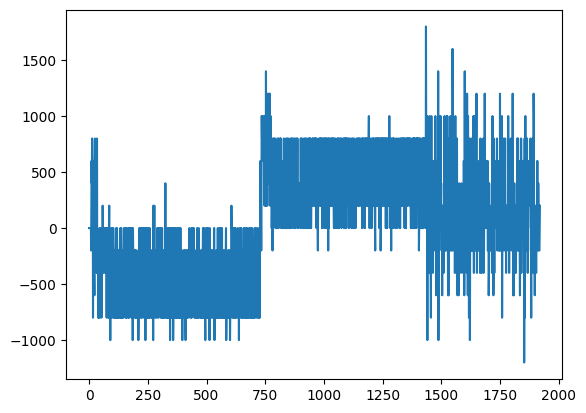

In [24]:
all_pats = patterns.sum(axis=1)
all_pats.plot()

## X paramiter for feeding Model

In [25]:
X = df.drop(['Sum','rsi','rsisignal'], axis=1)
X

,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,...,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,Close,High,Low,Open
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,27024.00,27026.74,27024.00,27024.06
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,27020.10,27026.84,27015.69,27020.16
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,26987.86,26988.35,26982.52,26987.92
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,26989.99,26992.42,26985.95,26990.07
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,26946.31,26949.51,26946.31,26946.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,26915.53,26928.63,26911.46,26927.25
1916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,26903.57,26923.52,26903.57,26915.52
1917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,26874.41,26903.58,26866.07,26903.58
1918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,26829.16,26874.41,26763.00,26874.41


## Y paramiter for feedind Model

In [26]:
y = df['Sum']
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
1915   -100.0
1916   -100.0
1917   -100.0
1918      0.0
1919    100.0
Name: Sum, Length: 1920, dtype: float64

## Model for AI Research

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model = DecisionTreeClassifier()
# model=RandomForestClassifier()
model

DecisionTreeClassifier()

## Fit X and y data to model

In [33]:
# model.fit(X, y)

## Calculating the Accuracy
### Normally I take very small data for that but in real application we have to take very big dataset

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.1)

model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(predictions[:5])
print(len(predictions))
print(y_test[:5])
accuracy_score(y_test, predictions)

[   0. -200.  400.  100. -300.]
192
838       0.0
425    -200.0
757     600.0
1875    100.0
109    -200.0
Name: Sum, dtype: float64


C:\Users\zihad\AppData\Local\Temp\ipykernel_1272\1322589592.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(y_test[:5])


0.7395833333333334

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.1)

## Export Train model

## Directally Grab Fidable data from internet but it have to be superviged test data from database

## Make Prediction With Train Model

In [36]:
from dataframe import GetDataframe
symbol = "BTCBUSD"

df = GetDataframe().get_minute_data(symbol, 1, 5)
df = df.iloc[:,0:10]
df.astype(float)
# df = df.drop(columns=['symbol','VolumeBUSD', 'CloseTime'])
# df = df.iloc[0]
# print(df)
results = []
cols = []
for attr in dir(talib):
    if attr[:3]=='CDL':
#         print(getattr(talib, attr))
        res = getattr(talib, attr)(df['Open'], df['High'], df['Low'],
                                         df['Close'])
        results.append(res)
        cols.append(attr)
# print(results)
# print(cols)

patterns = pd.DataFrame(results).T
patterns.columns = cols
patterns.astype(float)
patterns["Sum"] = patterns.sum(axis=1)
patterns
df = df.add(patterns, fill_value=0)
df = df.drop(['CloseTime', 'Sum'], axis=1)
df = df.iloc[-2]
# print(df)
print(model.predict([df]))

[0.]


C:\Users\user\PycharmProjects\TradingAiDevlopment\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [37]:
# print(df)

# model = joblib.load("btcbusd_trand_predictor.joblib")
# predictions = model.predict([df])
# predictions

## Use Tensorflow

In [30]:
X_train.shape

(1728, 65)

In [31]:
len(X_train)

1728

In [32]:
y_train.shape

(1728,)

In [33]:
import joblib

In [34]:
import tensorflow as tf
model = tf.keras.models.Sequential()

In [35]:
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(1))


In [36]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [37]:
model.fit(X_train,y_train, epochs=500)

Epoch 1/500
54/54 [==============================] - 2s 5ms/step - loss: 972880.0000 - accuracy: 0.0897
Epoch 2/500
54/54 [==============================] - 0s 4ms/step - loss: 35611.0977 - accuracy: 0.0631
Epoch 3/500
54/54 [==============================] - 0s 5ms/step - loss: 19682.6387 - accuracy: 0.0596
Epoch 4/500
54/54 [==============================] - 0s 4ms/step - loss: 13074.8320 - accuracy: 0.0764
Epoch 5/500
54/54 [==============================] - 0s 5ms/step - loss: 8008.5630 - accuracy: 0.0712
Epoch 6/500
54/54 [==============================] - 0s 6ms/step - loss: 5694.5283 - accuracy: 0.0712
Epoch 7/500
54/54 [==============================] - 0s 5ms/step - loss: 5162.6553 - accuracy: 0.0758
Epoch 8/500
54/54 [==============================] - 0s 6ms/step - loss: 3628.3020 - accuracy: 0.0833
Epoch 9/500
54/54 [==============================] - 0s 6ms/step - loss: 3564.5801 - accuracy: 0.0816
Epoch 10/500
54/54 [==============================] - 0s 6ms/step - loss: 315

54/54 [==============================] - 0s 5ms/step - loss: 3170.2466 - accuracy: 0.0799
Epoch 81/500
54/54 [==============================] - 0s 5ms/step - loss: 3291.4424 - accuracy: 0.0862
Epoch 82/500
54/54 [==============================] - 0s 3ms/step - loss: 2111.6089 - accuracy: 0.1001
Epoch 83/500
54/54 [==============================] - 0s 5ms/step - loss: 3576.3325 - accuracy: 0.0914
Epoch 84/500
54/54 [==============================] - 0s 5ms/step - loss: 3900.1438 - accuracy: 0.0851
Epoch 85/500
54/54 [==============================] - 0s 4ms/step - loss: 2590.4319 - accuracy: 0.0903
Epoch 86/500
54/54 [==============================] - 0s 5ms/step - loss: 4445.5483 - accuracy: 0.0920
Epoch 87/500
54/54 [==============================] - 0s 5ms/step - loss: 2715.7156 - accuracy: 0.0856
Epoch 88/500
54/54 [==============================] - 0s 4ms/step - loss: 2603.3113 - accuracy: 0.0920
Epoch 89/500
54/54 [==============================] - 0s 5ms/step - loss: 5156.4941 - 

54/54 [==============================] - 0s 4ms/step - loss: 1988.7893 - accuracy: 0.0955
Epoch 160/500
54/54 [==============================] - 0s 5ms/step - loss: 2291.9475 - accuracy: 0.0961
Epoch 161/500
54/54 [==============================] - 0s 4ms/step - loss: 2215.0513 - accuracy: 0.0955
Epoch 162/500
54/54 [==============================] - 0s 3ms/step - loss: 2120.6194 - accuracy: 0.0978
Epoch 163/500
54/54 [==============================] - 0s 5ms/step - loss: 1567.5022 - accuracy: 0.1019
Epoch 164/500
54/54 [==============================] - 0s 4ms/step - loss: 2223.5127 - accuracy: 0.0897
Epoch 165/500
54/54 [==============================] - 0s 5ms/step - loss: 1621.0178 - accuracy: 0.0938
Epoch 166/500
54/54 [==============================] - 0s 4ms/step - loss: 2142.0398 - accuracy: 0.0943
Epoch 167/500
54/54 [==============================] - 0s 4ms/step - loss: 1783.7944 - accuracy: 0.0949
Epoch 168/500
54/54 [==============================] - 0s 4ms/step - loss: 159

54/54 [==============================] - 0s 4ms/step - loss: 1514.9738 - accuracy: 0.0961
Epoch 238/500
54/54 [==============================] - 0s 4ms/step - loss: 1485.5272 - accuracy: 0.1094
Epoch 239/500
54/54 [==============================] - 0s 4ms/step - loss: 1852.8904 - accuracy: 0.1001
Epoch 240/500
54/54 [==============================] - 0s 5ms/step - loss: 1394.0038 - accuracy: 0.1024
Epoch 241/500
54/54 [==============================] - 0s 5ms/step - loss: 1459.0493 - accuracy: 0.0897
Epoch 242/500
54/54 [==============================] - 0s 5ms/step - loss: 1420.0775 - accuracy: 0.1013
Epoch 243/500
54/54 [==============================] - 0s 5ms/step - loss: 1473.4810 - accuracy: 0.0955
Epoch 244/500
54/54 [==============================] - 0s 4ms/step - loss: 1673.8180 - accuracy: 0.0943
Epoch 245/500
54/54 [==============================] - 0s 4ms/step - loss: 1805.8081 - accuracy: 0.1071
Epoch 246/500
54/54 [==============================] - 0s 4ms/step - loss: 139

54/54 [==============================] - 0s 5ms/step - loss: 1413.1849 - accuracy: 0.0885
Epoch 316/500
54/54 [==============================] - 0s 5ms/step - loss: 1388.5651 - accuracy: 0.0839
Epoch 317/500
54/54 [==============================] - 0s 6ms/step - loss: 1923.2886 - accuracy: 0.0938
Epoch 318/500
54/54 [==============================] - 0s 5ms/step - loss: 1599.0115 - accuracy: 0.0961
Epoch 319/500
54/54 [==============================] - 0s 6ms/step - loss: 1407.2358 - accuracy: 0.0990
Epoch 320/500
54/54 [==============================] - 0s 4ms/step - loss: 1718.3370 - accuracy: 0.0909
Epoch 321/500
54/54 [==============================] - 0s 4ms/step - loss: 1607.3724 - accuracy: 0.0839
Epoch 322/500
54/54 [==============================] - 0s 5ms/step - loss: 1243.9055 - accuracy: 0.1001
Epoch 323/500
54/54 [==============================] - 0s 5ms/step - loss: 1312.9779 - accuracy: 0.0781
Epoch 324/500
54/54 [==============================] - 0s 5ms/step - loss: 183

54/54 [==============================] - 0s 5ms/step - loss: 1438.8192 - accuracy: 0.0961
Epoch 394/500
54/54 [==============================] - 0s 4ms/step - loss: 1505.5842 - accuracy: 0.1013
Epoch 395/500
54/54 [==============================] - 0s 4ms/step - loss: 1308.9320 - accuracy: 0.0903
Epoch 396/500
54/54 [==============================] - 0s 4ms/step - loss: 1470.7036 - accuracy: 0.0903
Epoch 397/500
54/54 [==============================] - 0s 6ms/step - loss: 1550.8619 - accuracy: 0.0914
Epoch 398/500
54/54 [==============================] - 0s 4ms/step - loss: 1254.9381 - accuracy: 0.0897
Epoch 399/500
54/54 [==============================] - 0s 4ms/step - loss: 1376.3108 - accuracy: 0.1071
Epoch 400/500
54/54 [==============================] - 0s 4ms/step - loss: 1316.1356 - accuracy: 0.0868
Epoch 401/500
54/54 [==============================] - 0s 4ms/step - loss: 1297.6953 - accuracy: 0.0995
Epoch 402/500
54/54 [==============================] - 0s 5ms/step - loss: 131

54/54 [==============================] - 0s 5ms/step - loss: 1302.3192 - accuracy: 0.0914
Epoch 472/500
54/54 [==============================] - 0s 5ms/step - loss: 1245.1360 - accuracy: 0.0880
Epoch 473/500
54/54 [==============================] - 0s 5ms/step - loss: 1325.3823 - accuracy: 0.0903
Epoch 474/500
54/54 [==============================] - 0s 5ms/step - loss: 1357.8929 - accuracy: 0.0880
Epoch 475/500
54/54 [==============================] - 0s 5ms/step - loss: 1354.8688 - accuracy: 0.0897
Epoch 476/500
54/54 [==============================] - 0s 6ms/step - loss: 1256.0914 - accuracy: 0.0943
Epoch 477/500
54/54 [==============================] - 0s 4ms/step - loss: 1292.6725 - accuracy: 0.0856
Epoch 478/500
54/54 [==============================] - 0s 7ms/step - loss: 1256.0187 - accuracy: 0.0938
Epoch 479/500
54/54 [==============================] - 0s 4ms/step - loss: 1323.8556 - accuracy: 0.1013
Epoch 480/500
54/54 [==============================] - 0s 6ms/step - loss: 126

In [38]:

# model = model.fit(X_train, y_train)
joblib.dump(model, "btcbusd_trand_predictor_tf_3m.joblib")

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-03-28 16:46:58         1787
metadata.json                                  2023-03-28 16:46:58           64
variables.h5                                   2023-03-28 16:46:58      1018072


['btcbusd_trand_predictor_tf_3m.joblib']

In [47]:
model = joblib.load("btcbusd_trand_predictor_tf.joblib")

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-03-27 12:16:02         1791
metadata.json                                  2023-03-27 12:16:02           64
variables.h5                                   2023-03-27 12:16:02      1033432
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars


In [48]:
predictions = model.predict(X_test)
predictions[:10]

5/5 [==============================] - 0s 3ms/step


array([[ 123.73123  ],
       [  42.733006 ],
       [  21.126572 ],
       [-183.85295  ],
       [ 112.956604 ],
       [  15.628091 ],
       [  30.70573  ],
       [ 115.08845  ],
       [  12.0606165],
       [ 216.33743  ]], dtype=float32)

In [49]:
# Define the target values
targets = np.arange(-3000, 3001, 100)
# Calculate the closest target value to each element in the array
closest_target = np.array([targets[np.abs(targets - val).argmin()] for val in predictions])

In [50]:
closest_target[20:30]

array([ 100, -100,    0,  300,  100,    0, -100, -200,  800,    0])

In [51]:
y_test[20:30]

C:\Users\user\AppData\Local\Temp\ipykernel_4252\3831344921.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[20:30]


911     100.0
129    -100.0
897       0.0
807     300.0
1134    100.0
882       0.0
331    -100.0
656    -200.0
728     800.0
261       0.0
Name: Sum, dtype: float64

In [52]:
from dataframe import GetDataframe
symbol = "BTCBUSD"

df = GetDataframe().get_minute_data(symbol, 1, 5)
df = df.iloc[:,0:10]
df.astype(float)
# df = df.drop(columns=['symbol','VolumeBUSD', 'CloseTime'])
# df = df.iloc[0]
# print(df)
results = []
cols = []
for attr in dir(talib):
    if attr[:3]=='CDL':
#         print(getattr(talib, attr))
        res = getattr(talib, attr)(df['Open'], df['High'], df['Low'],
                                         df['Close'])
        results.append(res)
        cols.append(attr)
# print(results)
# print(cols)

patterns = pd.DataFrame(results).T
patterns.columns = cols
patterns.astype(float)
patterns["Sum"] = patterns.sum(axis=1)
patterns
df = df.add(patterns, fill_value=0)
df = df.drop(['CloseTime', 'Sum'], axis=1)
df = df.iloc[-2]
# print(df)
pred = model.predict(pd.DataFrame(df).transpose())
print(pred[0][0])

1/1 [==============================] - 0s 31ms/step
60.709454


In [36]:
print(pred[0]>=-100)

[ True]
